In [1]:
import numpy as np
%pylab inline
import matplotlib.pyplot as plt
from soliket import BinnedClusterLikelihood
from cobaya.model import get_model
import camb

params = {
    'cosmomc_theta': 0.0104135,
    'ns': 0.965,
    'ombh2': 0.0226576,      
    'omch2': 0.1206864, 
    'As': 2.022662e-9,
    'tenToA0': 4.35e-5,
    'B0': 0.08,
    'scatter_sz': 0.,
    'bias_sz': 1.,
    'tau': 0.055,
    'mnu': 0.0,
    'nnu': 3.046,
    'omnuh2': 0.,
    'w': -1
}

info = {
    'params': params,
    'likelihood': {'soliket.BinnedClusterLikelihood': {
        'single_tile_test': "no",
        'choose_dim': "1D",
        'Q_optimise': "yes",
        'stop_at_error': True,
        'data_path': "/Users/eunseonglee/SOLikeT/soliket/binned_clusters/data/so/",
        'cat_file': "MFMF_WebSkyHalos_A10tSZ_3freq_tiles/MFMF_WebSkyHalos_A10tSZ_3freq_tiles_mass.fits",
        'Q_file': "MFMF_WebSkyHalos_A10tSZ_3freq_tiles/selFn/quick_theta_Q.npz",
        'tile_file': "MFMF_WebSkyHalos_A10tSZ_3freq_tiles/selFn/tileAreas.txt",
        'rms_file': "MFMF_WebSkyHalos_A10tSZ_3freq_tiles/selFn/downsampled.txt"}},
    'theory': {'camb': {'extra_args': {'num_massive_neutrinos': 0}}}
}

# initialisation 
model = get_model(info)
like = model.likelihood['soliket.BinnedClusterLikelihood']
model.loglikes({})[0]

Populating the interactive namespace from numpy and matplotlib
[prior] *WARNING* No sampled parameters requested! This will fail for non-mock samplers.
[camb] Importing *global* CAMB.
[camb] Initialized!
 :::::: this is initialisation in binned_clusters.py
 :::::: reading catalogue
 Number of mass bins :  138
 SO for a full map
 1D likelihood as a function of redshift
 Total number of clusters in catalogue =  62475
 SNR cut =  5.0
 Number of clusters above the SNR cut =  43232
 The highest redshift = 2.62
 Number of redshift bins =  27
 Catalogue N
0 316.0
1 2175.0
2 4000.0
3 5081.0
4 5369.0
5 5253.0
6 4587.0
7 3992.0
8 3233.0
9 2565.0
10 1912.0
11 1418.0
12 1104.0
13 734.0
14 526.0
15 341.0
16 226.0
17 155.0
18 101.0
19 60.0
20 40.0
21 22.0
22 11.0
23 4.0
24 6.0
25 0.0
26 1.0
27 0.0
43232.0
 :::::: loading files describing selection function
 :::::: reading Q as a function of theta
 Number of Q functions =  1
 Using one averaged Q function for optimisation
 :::::: reading noise data
 

array([-156.60346553])

In [2]:
pk_intp = like.theory.get_Pk_interpolator(("delta_nonu", "delta_nonu"), nonlinear=False)
SZparams = {
    'tenToA0': 4.35e-5,
    'B0': 0.08,
    'scatter_sz': 0.,
    'bias_sz': 1.    
}
Nz = like._get_theory(pk_intp, **SZparams)

0 493.86332678696675
1 2112.1600644539794
2 4018.6875961108403
3 5141.741834496721
4 5478.69927125679
5 5248.0626252949005
6 4676.624892064351
7 3948.2315553657054
8 3192.871081193255
9 2491.1984045654376
10 1884.9770562115211
11 1388.286669057495
12 998.1245856673435
13 702.0429260630522
14 483.97358949081257
15 327.46639425750203
16 217.75523621632613
17 142.44426469207067
18 91.75503857388176
19 58.241896946554306
20 36.460156007200226
21 22.523098233483058
22 13.739873634568873
23 8.281539004086437
24 4.935495429526129
25 2.9099181707420168
26 1.6987295361785448
 Total predicted N =  43187.75711878129
 ::: theory N calculation took 0.2 seconds


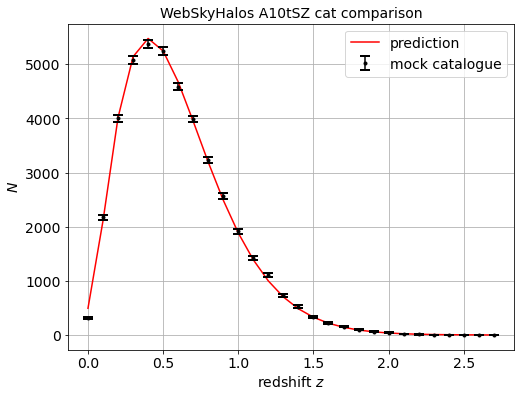

In [3]:
z, catNz = like.delNcat

plt.figure(figsize=(8,6))
plt.plot(z, Nz, 'r-', label='prediction')
plt.errorbar(z, catNz, yerr=np.sqrt(catNz), color='black', fmt='o', ms=3, capsize=5, capthick=2, ls='none', label='mock catalogue')
plt.xlabel('redshift $z$', fontsize=14)
plt.ylabel('$N$', fontsize=14)
plt.title('WebSkyHalos A10tSZ cat comparison', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.grid()

In [4]:
# 2D N calculation 

info = {
    'params': params,
    'likelihood': {'soliket.BinnedClusterLikelihood': {
        'single_tile_test': "no",
        'choose_dim': "2D", # change option here 
        'Q_optimise': "yes",
        'stop_at_error': True,
        'data_path': "/Users/eunseonglee/SOLikeT/soliket/binned_clusters/data/so/",
        'cat_file': "MFMF_WebSkyHalos_A10tSZ_3freq_tiles/MFMF_WebSkyHalos_A10tSZ_3freq_tiles_mass.fits",
        'Q_file': "MFMF_WebSkyHalos_A10tSZ_3freq_tiles/selFn/quick_theta_Q.npz",
        'tile_file': "MFMF_WebSkyHalos_A10tSZ_3freq_tiles/selFn/tileAreas.txt",
        'rms_file': "MFMF_WebSkyHalos_A10tSZ_3freq_tiles/selFn/downsampled.txt"}},
    'theory': {'camb': {'extra_args': {'num_massive_neutrinos': 0}}}
}

# initialisation 
model = get_model(info)
like = model.likelihood['soliket.BinnedClusterLikelihood']
model.loglikes({})[0]

[prior] *WARNING* No sampled parameters requested! This will fail for non-mock samplers.
[camb] Importing *global* CAMB.
[camb] Initialized!
 :::::: this is initialisation in binned_clusters.py
 :::::: reading catalogue
 Number of mass bins :  138
 SO for a full map
 2D likelihood as a function of redshift and signal-to-noise
 Total number of clusters in catalogue =  62475
 SNR cut =  5.0
 Number of clusters above the SNR cut =  43232
 The highest redshift = 2.62
 Number of redshift bins =  27
 Catalogue N
0 316.0
1 2175.0
2 4000.0
3 5081.0
4 5369.0
5 5253.0
6 4587.0
7 3992.0
8 3233.0
9 2565.0
10 1912.0
11 1418.0
12 1104.0
13 734.0
14 526.0
15 341.0
16 226.0
17 155.0
18 101.0
19 60.0
20 40.0
21 22.0
22 11.0
23 4.0
24 6.0
25 0.0
26 1.0
27 0.0
43232.0
 The lowest SNR = 5.00
 The highest SNR = 93.46
 Number of SNR bins =  6
 Edges of SNR bins =  [  3.98107171   7.07945784  12.58925412  22.38721139  39.81071706
  70.79457844 125.89254118]
 Catalogue N in SNR bins
 0 24950.0
 1 14092.0
 2 3

array([-494.3953134])

0 493.8633562251073
1 2112.158714613206
2 4018.6736192908147
3 5141.711214702661
4 5478.66434683374
5 5248.034806888137
6 4676.607256097811
7 3948.222214329605
8 3192.8669747670415
9 2491.1970916133982
10 1884.9769783103495
11 1388.2870157077416
12 998.1249975218295
13 702.0432743585825
14 483.97384596163647
15 327.4665687887661
16 217.75534927997506
17 142.44433537396807
18 91.75508157836333
19 58.241922507128
20 36.46017088923602
21 22.52310673764023
22 13.739878409784811
23 8.281541640619904
24 4.9354968620301785
25 2.9099189368447376
26 1.6987299396889535
27 0.0
 Total predicted 2D N =  43187.61780816571
 ::: theory N calculation took 1.1 seconds


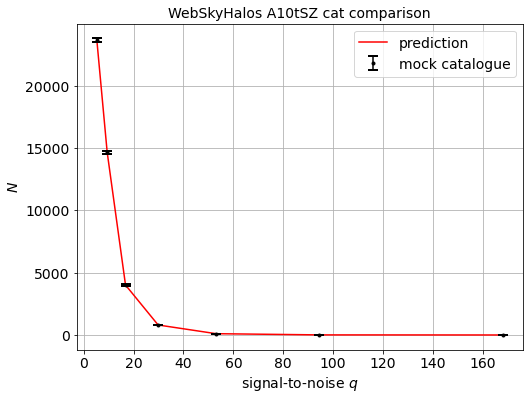

In [5]:
Nzq = like._get_theory(pk_intp, **SZparams)
z, q, catNzq = like.delN2Dcat

Nq = np.zeros(len(q))
catNq = np.zeros(len(q))
for i in range(len(q)):
   Nq[i] = Nzq[:,i].sum()    
   catNq[i] = catNzq[:,i].sum()

plt.figure(figsize=(8,6))
plt.plot(10**q, Nq, 'r-', label='prediction')
plt.errorbar(10**q, Nq, yerr=np.sqrt(Nq), color='black', fmt='o', ms=3, capsize=5, capthick=2, ls='none', label='mock catalogue')
plt.xlabel('signal-to-noise $q$', fontsize=14)
plt.ylabel('$N$', fontsize=14)
plt.title('WebSkyHalos A10tSZ cat comparison', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.grid()